In [10]:
import numpy as np
import random
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import time
import os
from IPython.display import clear_output

## Agenda

- look up how to simulate cellular automata 
- how to incorporate temporal delays
- how to apply that on graphs

## Ergodic spiking networks
- Create ergodic/irreducible/aperiodic Markov chain
- Allow some nodes to fire [periodically?] or probabilistically
- Should ergodic chain generator be tuple or adjacency matrix, or both?
- What p distr should edge probs pull from?
- Algebraic connectivity is an interesting concept related to synchronization
- Look into random graphs: erdos-renyi, dual phase evolution, etc.  Those with community structure and small world could be interesting.  1/f degree distribution
    - How do you work backwards and create a graph based on its degree distribution?
    - Create a complete graph then prune edges until satisfied
    - What is the maximum degree on some scale free network where degree distribution is 1/f but those degrees are not randomly assigned? It cannot be = number of nodes .
           - E.g if that were the case then on a 10 node graph you'd have one 10 degree, 1.11 9 degree, 
- Vis: use arcs for d3 force directed graph

*Notes*

- Graphs are advantageous over 2d because they allow for any dimension (cells don't have to be adjacent) even though you can still represent in 2d

In [ ]:
class Neuron(object):
    def __init__(self, _input, charge):
        self.charge = charge #charge as in excitatory (positive) or inhibitory (negative)
    def refractory_period(self):
        
        
class Network(Neuron):
    def __init__(self, Neurons):
        Neuron.__init__(self, _input)
        

### Ergodic markov chain

In [ ]:
def make_markov(num_nodes):
    """Output is a list of tuples [(a,b)...]"""
    nodes = list(range(num_nodes))
    
    #check for reduceability 
    while True:
        #create random edges, with probabilities  
        #after edge created, check for 
    #check for aperiodicity with some sort of search algo

In [50]:
def zipfian_degree_distr(size):
    """Creates a distribution of degrees sampling from 1/|V|"""
    # still need it to satisfy handshake lemma
    size = size-1
    degrees = list(range(1,size+1))
    size_dict = dict((d,0) for d in degrees)
    d_distr = []
    while True:
        for i in degrees:
            if sum(size_dict.values()) >= size:
                for v in size_dict.keys():
                    d_distr = d_distr + [v for i in range(size_dict[v])]
                return random.sample(d_distr, size)

            size_dict[i] = size_dict[i] + random.choice([1] + [0 for j in range(i-1)])
        

In [53]:
def graph_from_degrees(degrees, weighted = True):
    """
    Creates a random graph from list of degrees
    If weighted = True makes probabilistic edges
    Currently for undirected graphs
    """
    num_nodes = len(degrees)
    degrees.sort(reverse = True)
    adj_mat = np.zeros((num_nodes, num_nodes))
    nodes = random.sample(list(range(num_nodes)), num_nodes)
    node_degrees = {} #node degree pairs
    for it, d in enumerate(degrees):
        curr_node = nodes[it]
        edges_made = 0
        while edges_made < d:
            neighbor = random.sample(nodes, 1)
            if adj_mat[curr_node][neighbor] == 0:
                adj_mat[curr_node][neighbor] = 1
                edges_made+=1
            elif adj_mat[curr_node][neighbor] != 0:
                #check if adding an edge will not disrupt the previous degree 
                pass
        
    return adj_mat

Which distribution of degrees on graphs are possible and which aren't? (handshaking lemma)

How many different graphs are possible from a distribution of degrees?


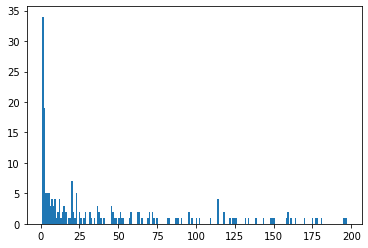

In [51]:
x = zipfian_degree_distr(200)
plt.hist(x, bins=200)
plt.show()

# Time blind network and sim

- input is spiked "neurons"
- return raster

For weighted graph, vector at each time step sems to be multiplication of past edge weight

In [36]:
def fire(network, neurons_init, time):

    raster = []
    for i in range(1,time+1):
        raster.append(np.linalg.matrix_power(network.T, i)@A.T)
        
    return raster

In [44]:
fire(B, A, 5)

[array([0. , 0.7, 0.8, 0.9, 0. ]),
 array([0.  , 0.  , 0.14, 0.  , 0.24]),
 array([0.   , 0.   , 0.   , 0.144, 0.042]),
 array([0.    , 0.    , 0.    , 0.0252, 0.    ]),
 array([0., 0., 0., 0., 0.])]

In [52]:
fire(B1,A1,5)

[array([0, 1, 1, 1, 0]),
 array([0, 0, 1, 0, 1]),
 array([0, 0, 0, 1, 1]),
 array([0, 0, 0, 1, 0]),
 array([0, 0, 0, 0, 0])]

In [48]:
A = np.array( [1,0,0,0,0])    
            #  A B C D E
B = np.array([[0,.7,.8,.9,0],  #A
              [0,0,.2,0,0],  #B
              [0,0,0,0,.3],  #C
              [0,0,0,0,0],  #D
              [0,0,0,.6,0]]) #E

np.linalg.matrix_power(B.T, 3)@A.T

array([0.   , 0.   , 0.   , 0.144, 0.042])

In [60]:
A1 = np.array( [1,0,0,0,0])    
            #  A B C D E
B1 = np.array([[0,1,1,1,0],  #A
              [0,0,1,0,0],  #B
              [0,0,0,0,1],  #C
              [0,0,0,0,0],  #D
              [0,0,0,1,0]]) #E

np.linalg.matrix_power(B1.T, 5)@A1.T

array([0, 0, 0, 0, 0])

In [56]:
[i for i in range( B1.shape[1])]

[0, 1, 2, 3, 4]

In [57]:
np.zeros(1)

array([0.])

In [59]:
def matrix_bfs(adj_mat, pair):
    nodes = [i for i in range(adj_mat.shape[1])]
    position =  np.zeros(adj_mat.shape[1])
    position[pair[0]] = 1
    t = 1
    
    raster = []
    while position[pair[1]] != 1:
        position = np.linalg.matrix_power(adj_mat.T, t)@position.T
        raster.append(position)
        t+=1
    
    return raster

can this solve travelling salesman?

In [61]:
matrix_bfs(B1,[0,4])

[array([0., 1., 1., 1., 0.]), array([0., 0., 0., 1., 1.])]

### Noodling with cellular automata

### 2D case:

In [205]:
def update2d(neurons):
    for i in range(len(neurons)): #where d1 is 1d array of neurons in neurons[:]
        for j in range(len(neurons[i])):
            if neurons[i][j] == 1:
                try:
                    neurons[i][j] = 0
                    neurons[i+1][j+1] = 1
                    #neurons[i-1][j-1] = 1
                    return neurons
                except IndexError:
                    neurons[i][j] = 0
                    return neurons
    
def pulse2d(neurons):
    
    plt.figure()
    while 1 in np.matrix(neurons):
        #print(np.matrix(neurons), end="\r")
        
        plt.figure()
        plt.imshow(neurons)
        plt.show()
        update2d(neurons)
        time.sleep(.3)
        clear_output(wait=True)
#         if input("Enter 'q' to quit\n") == 'q':
#             break
    #print(np.matrix(neurons), end="\r")
    plt.imshow(neurons)
    plt.show()
    
def init_spike(width = 10, loc_on = None, pcnt_on = None, mode = 'random'):
    """
    Returns initial conditions for neuron raster
    width is an int n for dimensions of n x n raster 
    If mode == 'random', activates pcnt_on% of neurons in raster randomly
    If mode == 'center', initiates center neurons
    
    Otherwise only activates neurons at coordinates given in loc_on, of format [[x1,y2],[y1,y2],...]
    """
    
    raster = [list(np.zeros(width, dtype= int)) for i in np.arange(width)]
    num_rand = width*width*pcnt_on
    
    #helper function to generate random coordinates
    def gen_rand_coords():   
        for i in np.arange(num_rand):
            rand_coord = list(np.random.randint(0,width,2))
            if len(rand_loc) == num_rand:
                break
            if rand_coord not in rand_loc:
                rand_loc.append(rand_coord)
            else:
                gen_rand_coords()   
                
    if mode == None:
        for i, n in enumerate(loc_on):
            for j in n:
                raster[i][j] = 1
    
    if mode == 'random':
        rand_loc = []
        gen_rand_coords()
        
        for coord in rand_loc:
            x = coord[0]; y = coord[1];
            raster[x][y] = 1
        
    return raster

In [190]:
neurons = init_spike(pcnt_on=.44)

In [206]:
pulse2d(init_spike(pcnt_on=.44))

KeyboardInterrupt: 